In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import sklearn

In [4]:
import matplotlib as mpl

In [5]:
import matplotlib.pyplot as plt

# I. Bringing the dataset into our environment

In [6]:
lobsterland = pd.read_csv("lobsterland_2020.csv")

# II. Exploratory Data Analysis

A.

In [7]:
lobsterland.head()

,DATE,WEEKDAY,LOW.TEMP,HIGH.TEMP,PRECIP,DayPass,GoldZoneRev,RidePax,TShirts,LobsterRolls,SnackShack,StaffHours,FirstAid,MaineStatus,Event,TotalRevenue
0,25May,Monday,40,58,0.0,3642,28034.42,16471,950,1729,22678.03,660.53,2,1,0,139359.29
1,26May,Tuesday,52,70,0.0,3182,23767.15,14287,781,410,19827.31,551.23,2,1,0,103543.62
2,27May,Wednesday,53,77,0.0,1983,14833.90,9005,332,343,12341.85,427.60,4,1,2,62761.28
3,28May,Thursday,62,86,0.0,3600,26461.20,16244,1050,1418,22678.48,702.52,1,1,1,134613.21
4,29May,Friday,46,78,NaN,3280,24557.22,14868,683,952,20562.37,597.39,0,1,0,112417.57


B. The first 5 rows are visible

C.106 rows and 16 columns

In [8]:
lobsterland.shape

(106, 16)

D. 

In [9]:
lobsterland["FirstAid"].value_counts()

4    23
2    20
3    20
1    17
5    14
0    12
Name: FirstAid, dtype: int64

D - a. The first and second runs differ because the first gives absolute counts, while the second gives normalized proportions of the total.

In [10]:
lobsterland["FirstAid"].value_counts(normalize = True)

4    0.216981
2    0.188679
3    0.188679
1    0.160377
5    0.132075
0    0.113208
Name: FirstAid, dtype: float64

E. What does make sense is the averages are highest on Fridays, Saturdays, and Sundays. What doesn't make sense, at least at first glance, is that Mondays have the largest MAX. Thinking about it though, this is probably because of holidays that fall on Mondays, like Memorial Day, Labor Day, etc.

In [11]:
lobsterland.groupby("WEEKDAY").describe()["TotalRevenue"]

,count,mean,std,min,25%,50%,75%,max
WEEKDAY,,,,,,,,
Friday,15.0,132369.060000,24588.576529,98882.20,114913.5800,125429.68,139120.2900,178007.92
Monday,16.0,96449.813750,53984.971936,49130.38,63036.1675,82258.27,110258.7575,269809.57
Saturday,15.0,131738.331333,26974.811264,98764.47,110913.0150,132357.98,141362.4450,205921.43
Sunday,15.0,141114.192000,26073.822524,106479.28,119541.2300,141902.30,152939.5750,202122.37
Thursday,15.0,95630.228667,26651.418811,53665.88,71863.1150,97429.95,114155.3750,136262.71
Tuesday,15.0,86126.008000,26050.565339,46421.47,68512.7850,84014.56,101417.1200,137817.75
Wednesday,15.0,84117.602667,22106.686279,38958.76,68615.7850,84772.22,98515.3150,119058.17


F. Removing LOW.TEMP

In [12]:
lobsterland.shape

(106, 16)

There are 16 columns

In [13]:
lobsterland = lobsterland.drop(['LOW.TEMP'],axis = 1)

In [14]:
lobsterland.shape

(106, 15)

There are now 15 columns

G. The line below shows if there are any nans and which columns they are in

In [15]:
lobsterland.isnull().sum()

DATE            0
WEEKDAY         0
HIGH.TEMP       0
PRECIP          4
DayPass         0
GoldZoneRev     6
RidePax         0
TShirts         0
LobsterRolls    0
SnackShack      0
StaffHours      0
FirstAid        0
MaineStatus     0
Event           0
TotalRevenue    0
dtype: int64

In [16]:
lobsterland['PRECIP'] = lobsterland['PRECIP'].fillna(0)

The below line finds the means for each day and puts them in a data frame

In [17]:
GoldZoneRevMeans = lobsterland.groupby("WEEKDAY").mean()["GoldZoneRev"]
GoldZoneRevMeans

WEEKDAY
Friday       27510.346429
Monday       19009.044375
Saturday     26240.460000
Sunday       30128.655333
Thursday     20225.724667
Tuesday      18735.635714
Wednesday    18598.305385
Name: GoldZoneRev, dtype: float64

The below function finds assigns the correct goldzonerev mean to the day the nan is on

In [18]:
NaNIndx = []

def fillGoldZoneRevMean(x):
    for j, i in enumerate(x["GoldZoneRev"]):
        if pd.isna(i):
            NaNIndx.append(j)
            x["GoldZoneRev"][j] = GoldZoneRevMeans[(x["WEEKDAY"][j])]
    return x

lobsterland = fillGoldZoneRevMean(lobsterland)

/var/folders/9f/5h5b6t110xj5cpynh9xjflsr0000gn/T/ipykernel_12158/3154233536.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["GoldZoneRev"][j] = GoldZoneRevMeans[(x["WEEKDAY"][j])]


In [19]:
lobsterland.isnull().sum()

DATE            0
WEEKDAY         0
HIGH.TEMP       0
PRECIP          0
DayPass         0
GoldZoneRev     0
RidePax         0
TShirts         0
LobsterRolls    0
SnackShack      0
StaffHours      0
FirstAid        0
MaineStatus     0
Event           0
TotalRevenue    0
dtype: int64

In [20]:
print(lobsterland["GoldZoneRev"][NaNIndx])

12    26240.460000
18    27510.346429
19    26240.460000
29    18735.635714
37    18598.305385
86    18598.305385
Name: GoldZoneRev, dtype: float64


Now there are no NaNs in GoldZoneRev. The two above lines show that there are no nulls in any columns,
and that the values at indexes originally null have been replaced with means

It makes sense to replace the precip nulls with 0 because many of the existing values are also 0. It's not outside of the realm of possibility, nor likely to bring the averages down if we replace missing values with 0. In the case of the GoldZoneRev, replacing nulls with 0 would likely pull the averages down and skew the data.

G2.

In [21]:
FiveRain = lobsterland.sort_values(by=['PRECIP'], ascending=False).head()
FiveRain

,DATE,WEEKDAY,HIGH.TEMP,PRECIP,DayPass,GoldZoneRev,RidePax,TShirts,LobsterRolls,SnackShack,StaffHours,FirstAid,MaineStatus,Event,TotalRevenue
35,29Jun,Monday,67,2.51,4320,39710.27,1927,1003,798,27099.58,921.15,1,2,0,269809.57
96,29Aug,Saturday,66,1.28,3087,34398.02,1382,662,1057,19379.96,626.56,4,3,0,205921.43
81,14Aug,Friday,88,0.62,3518,26174.11,7899,743,1793,21958.61,633.34,2,3,0,132092.23
50,14Jul,Tuesday,82,0.62,1947,14698.75,4385,381,898,12162.48,396.36,1,3,0,71327.06
75,08Aug,Saturday,84,0.52,2934,21217.89,6542,632,949,18270.05,641.82,4,3,0,101580.65


In [22]:
FiveRain.describe()

,HIGH.TEMP,PRECIP,DayPass,GoldZoneRev,RidePax,TShirts,LobsterRolls,SnackShack,StaffHours,FirstAid,MaineStatus,Event,TotalRevenue
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.000000
mean,77.400000,1.110000,3161.200000,27239.808000,4427.000000,684.200000,1099.000000,19774.136000,643.846000,2.400000,2.800000,0.0,156146.188000
std,10.188229,0.839226,866.246328,10017.856132,2830.715369,223.740251,399.030701,5449.518624,186.118319,1.516575,0.447214,0.0,80850.501593
min,66.000000,0.520000,1947.000000,14698.750000,1382.000000,381.000000,798.000000,12162.480000,396.360000,1.000000,2.000000,0.0,71327.060000
25%,67.000000,0.620000,2934.000000,21217.890000,1927.000000,632.000000,898.000000,18270.050000,626.560000,1.000000,3.000000,0.0,101580.650000
50%,82.000000,0.620000,3087.000000,26174.110000,4385.000000,662.000000,949.000000,19379.960000,633.340000,2.000000,3.000000,0.0,132092.230000
75%,84.000000,1.280000,3518.000000,34398.020000,6542.000000,743.000000,1057.000000,21958.610000,641.820000,4.000000,3.000000,0.0,205921.430000
max,88.000000,2.510000,4320.000000,39710.270000,7899.000000,1003.000000,1793.000000,27099.580000,921.150000,4.000000,3.000000,0.0,269809.570000


In [23]:
lobsterland.describe()

,HIGH.TEMP,PRECIP,DayPass,GoldZoneRev,RidePax,TShirts,LobsterRolls,SnackShack,StaffHours,FirstAid,MaineStatus,Event,TotalRevenue
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,79.320755,0.089340,3033.500000,22884.260594,11600.915094,630.584906,1129.103774,18847.270849,612.543679,2.632075,2.584906,0.320755,109524.795849
std,7.985161,0.299362,924.720758,6784.543408,4983.127041,261.807922,485.061153,5641.192265,180.828353,1.575560,0.615172,0.669715,38034.594151
min,58.000000,0.000000,1101.000000,9612.610000,1382.000000,142.000000,215.000000,6951.980000,219.300000,0.000000,1.000000,0.000000,38958.760000
25%,73.250000,0.000000,2285.000000,17844.162500,7595.750000,431.500000,786.000000,14421.760000,475.690000,1.000000,2.000000,0.000000,83401.997500
50%,79.000000,0.000000,3065.000000,22870.645000,11413.000000,600.000000,1156.500000,19176.765000,613.090000,3.000000,3.000000,0.000000,107458.095000
75%,85.750000,0.010000,3681.750000,27681.520000,15832.750000,829.500000,1416.750000,22814.197500,735.035000,4.000000,3.000000,0.000000,132405.777500
max,94.000000,2.510000,5296.000000,40368.130000,23914.000000,1457.000000,2446.000000,33287.430000,1062.840000,5.000000,3.000000,2.000000,269809.570000


In [24]:
cor = FiveRain.corr()
cor.style.background_gradient(cmap='coolwarm')

/Users/russelllaros/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/russelllaros/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,HIGH.TEMP,PRECIP,DayPass,GoldZoneRev,RidePax,TShirts,LobsterRolls,SnackShack,StaffHours,FirstAid,MaineStatus,Event,TotalRevenue
HIGH.TEMP,1.000000,-0.814014,-0.410979,-0.783885,0.964651,-0.458255,0.556585,-0.420905,-0.520784,-0.061484,0.570637,nan,-0.836085
PRECIP,-0.814014,1.000000,0.744137,0.859253,-0.730991,0.789669,-0.434197,0.750832,0.820925,-0.343744,-0.932554,nan,0.932665
DayPass,-0.410979,0.744137,1.000000,0.868148,-0.189815,0.995874,0.130238,0.999931,0.961133,-0.104169,-0.747811,nan,0.838214
GoldZoneRev,-0.783885,0.859253,0.868148,1.000000,-0.607266,0.877890,-0.085668,0.873370,0.866383,0.038557,-0.695877,nan,0.985149
RidePax,0.964651,-0.730991,-0.189815,-0.607266,1.000000,-0.245883,0.659814,-0.200802,-0.318399,0.039716,0.493706,nan,-0.689362
TShirts,-0.458255,0.789669,0.995874,0.877890,-0.245883,1.000000,0.040754,0.996270,0.980461,-0.121125,-0.796525,nan,0.860747
LobsterRolls,0.556585,-0.434197,0.130238,-0.085668,0.659814,0.040754,1.000000,0.124530,-0.134599,0.048747,0.421682,nan,-0.215140
SnackShack,-0.420905,0.750832,0.999931,0.873370,-0.200802,0.996270,0.124530,1.000000,0.961805,-0.106185,-0.751451,nan,0.844398
StaffHours,-0.520784,0.820925,0.961133,0.866383,-0.318399,0.980461,-0.134599,0.961805,1.000000,-0.060619,-0.832898,nan,0.864144
FirstAid,-0.061484,-0.343744,-0.104169,0.038557,0.039716,-0.121125,0.048747,-0.106185,-0.060619,1.000000,0.516047,nan,-0.078344


According to just these 5 rows, it seems that the precipitation amount has a high positive correlation to many of the variables. Ones that make sense to me, especially when comparing the means and std of the top 5 rainiest days and the whole summer, is that tshirt and snack shack sales are higher when there's more rain. This would make sense given that if it's rainign people are less likely to take rides, and more likely to stay inside and eat/shop. 

H.

In [25]:
eff = lobsterland["TotalRevenue"]/lobsterland["StaffHours"]

In [26]:
lobsterland = lobsterland.merge(eff.rename("Efficiency"), left_index=True, right_index=True)

In [27]:
lobsterland.sort_values(by=['Efficiency'], ascending=False).head()

,DATE,WEEKDAY,HIGH.TEMP,PRECIP,DayPass,GoldZoneRev,RidePax,TShirts,LobsterRolls,SnackShack,StaffHours,FirstAid,MaineStatus,Event,TotalRevenue,Efficiency
96,29Aug,Saturday,66,1.28,3087,34398.02,1382,662,1057,19379.96,626.56,4,3,0,205921.43,328.653968
35,29Jun,Monday,67,2.51,4320,39710.27,1927,1003,798,27099.58,921.15,1,2,0,269809.57,292.905140
21,15Jun,Monday,71,0.00,1733,13489.22,7795,329,823,10797.66,243.91,5,2,0,64002.74,262.403100
16,10Jun,Wednesday,64,0.02,2626,19779.45,5958,608,1187,16505.84,442.13,2,2,0,97755.26,221.100717
0,25May,Monday,58,0.00,3642,28034.42,16471,950,1729,22678.03,660.53,2,1,0,139359.29,210.981015


# III. Data Visualization

I. This makes sense, as day passes increase, the number of riders also increases in a linear fashion. What's strange about this plot though is the second linear relationship.

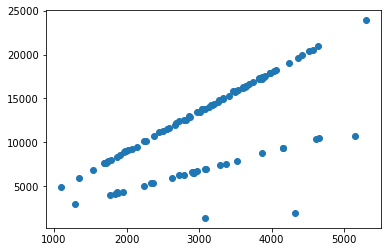

In [28]:
plt.scatter(x=lobsterland['DayPass'], y=lobsterland['RidePax'])

J. It does not seem like rainfall has any significant relationship to the linear data. This is probably because the majority of the days over the summer had little to no rainfall. The only days with significant rainfall are the two outliers towards the bottom of the plot. It makes sense that these two points are low on the y-axis, because as there's more rain less people will ride the rides.

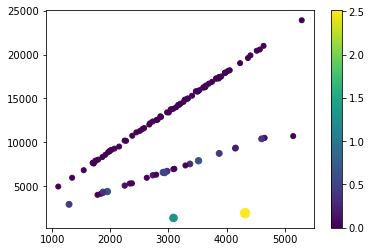

In [29]:
plt.scatter(x=lobsterland['DayPass'], y=lobsterland['RidePax'], s=(lobsterland["PRECIP"]+1)*25, c = lobsterland["PRECIP"], cmap = 'viridis')
plt.colorbar()

K. On weekends with no promotion the snack shack made the most. Nights with live msuic made the second most, and nights with the kids under 10 get in free promotion made the least on average. I think it would be helpful to know what nights of the week these events were being held on. That would give us more insight into whether the promotions were actually working or not.

In [30]:
dat = lobsterland.groupby("Event").mean()["SnackShack"]
dat

Event
0    19829.808810
1    16764.004000
2    13705.560833
Name: SnackShack, dtype: float64

<BarContainer object of 3 artists>

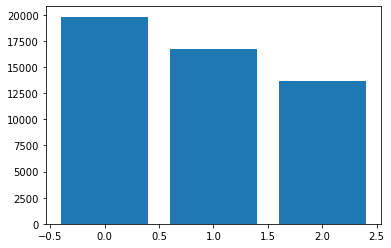

In [31]:
plt.bar(x=[0,1,2], height=dat)

L. This bar plot actually shows that the snack shack does more sales during the week. This is surprising given that the park sees more customers during the weekend.

<BarContainer object of 7 artists>

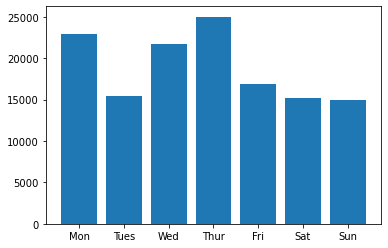

In [32]:
plt.bar(x=["Mon","Tues","Wed","Thur","Fri","Sat","Sun"], height=lobsterland.groupby("WEEKDAY").mean()["SnackShack"])

M.

Text(0.5, 1.0, 'Histogram of Lobster Rolls Sold')

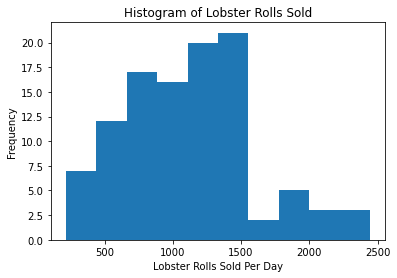

In [33]:
plt.hist(lobsterland["LobsterRolls"])
plt.xlabel("Lobster Rolls Sold Per Day")
plt.ylabel("Frequency")
plt.title("Histogram of Lobster Rolls Sold")

N. The finer detail histogram shows that the majority of sales happens 200-1600 rolls per day. After that there is a drop off. This histogram probably needs more data to show a clearer distribution.

Text(0.5, 1.0, 'Histogram of Lobster Rolls Sold')

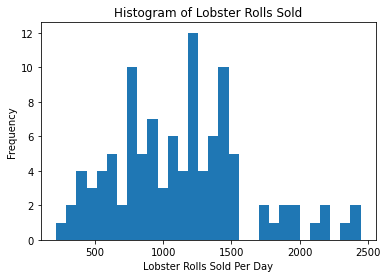

In [34]:
plt.hist(lobsterland["LobsterRolls"], bins = 30)
plt.xlabel("Lobster Rolls Sold Per Day")
plt.ylabel("Frequency")
plt.title("Histogram of Lobster Rolls Sold")